# PyTorch Library (Part 2)

In [51]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Suppose there is data with an independent vector $x_i$ and a dependent vector $y_i$ (i is the position of the value in the dataset).

Examples:

- $x_i$ is the height of the ith person; $y_i$ is the weight (predicting weight with height).
- $x_i$ is an image of a digit; $y_i$ is the actual digit (predicting what the number is on an image).
- $x_i$ is some medical image; $y_i$ corresponds to the pixels of a tumor.


Define a function f that depends on parameters $a$ and makes predictions. This is what neural networks do.

$$\hat y_i = f(x_i ; a)$$

The goal is to make the predictions ($\hat y_i$) as close to the real values $y_i$ as possible by tweaking the parameters like dials to minimize what is called the **loss function** defined as $L(y, \hat y)$. The loss function is calculated as follows:

$$L(y, \hat y) = \sum_{i} (y-\hat y)^2$$

# Matching Numbers

In [52]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

- $x_1 = (6, 2)$, $x_2 = (5, 2)$, etc.
- $y_1 = 1$, $y_2 = 5$, etc.

In [53]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

We want a function f that depends on parameters $a$ that gets us from x to y.

**An Idea**:

1. First multiply each element in x by a $8 \times 2$ matrix (16 parameters $a_i$)
2. Then multiply each element in x by a $1 \times 8$ matrix (8 parameters $a_i$)

This creates the layers of the neural network. 

An important note is that **a matrix is initially created with random values.**

In [54]:
M1 = nn.Linear(2, 8, bias = False) # y = xA^T + b is the calculation done for linear tranformations. when bias = False, b, the bias vector, is 0. T transposes the matrix.
M1 # It takes in a 2D vector and outputs an 8D vector. 2 corresponds with the number of features in independent vector x; 8 is a random number for the number of output features.

Linear(in_features=2, out_features=8, bias=False)

**M** applies the same matrix multiplication to each element (or instance) of independent vector x.

In [55]:
M1(x)

tensor([[-5.0962, -3.7738,  1.8048,  3.1544, -2.6156, -1.9963,  0.7558, -2.7236],
        [-4.4794, -3.3311,  1.3821,  2.8364, -2.1687, -1.6947,  0.5937, -2.0574],
        [-2.7102, -2.1192, -0.6743,  2.1881, -0.3482, -0.5820, -0.1636,  1.2444],
        [-8.5042, -6.4519,  0.7648,  5.9659, -2.9309, -2.6717,  0.4836, -0.8423]],
       grad_fn=<MmBackward0>)

Now, chain with a second matrix **M2**

In [56]:
M2 = nn.Linear(8, 1, bias = False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [ ]:
M2(M1(x)).squeeze() # squeeze() removes an extra dimension so that it will have the same shape as vector y.

tensor([-1.1546, -1.0496, -0.8920, -2.3089], grad_fn=<SqueezeBackward0>)

In [58]:
y

tensor([1., 5., 2., 5.])

Notice that vector y and the final tensor are not the same! This is why **training** the neural network is necessary in order for the proper predictions to be made. 

Adjusting the weights of matrices M1 & M2 are the way to properly training the network.

# Neural Network Class

The weights of M1 & M2 are constitute the weights $a$ of the network. In order to optimize for those, we must first make the neural network $f$: 

In [59]:
class MyFirstNetwork(nn.Module): # nn.Module is a super class which our class will inherit its attributes and methods from.
    def __init__(self):
        super().__init__() # This is the line that makes our class inherit from the nn.Module class.
        self.Mat1 = nn.Linear(2, 8, bias = False)
        self.Mat2 = nn.Linear(8, 1, bias = False)
    def forward(self, x): # Define a forward method for forward propagation.
        x = self.Mat1(x) # Applies the linear transformation of Mat1.
        x = self.Mat2(x) # Applies the linear transformation of Mat2 after Mat1.
        return x.squeeze()

The reason that the class should inherit from nn.Module is so that the network's parameters could be conveniently stored. Doing this will prove useful when adjusting them.

In [60]:
f = MyFirstNetwork()

In [61]:
for parameter in f.parameters():
    print(parameter) # Shows the parameters of each matrix in neural network f.

Parameter containing:
tensor([[ 0.6821, -0.3383],
        [ 0.0382,  0.1186],
        [ 0.0179,  0.6787],
        [-0.0360,  0.0727],
        [ 0.7009,  0.6191],
        [-0.5386, -0.3891],
        [-0.2754, -0.2819],
        [ 0.5931, -0.3423]], requires_grad=True)
Parameter containing:
tensor([[-0.3128, -0.3204,  0.2173, -0.0377,  0.1426, -0.0316, -0.3033,  0.1575]],
       requires_grad=True)


In [62]:
yhat = f(x)
yhat

tensor([1.1310, 1.0574, 1.1078, 2.5834], grad_fn=<SqueezeBackward0>)

## Adjusting $a$ So That $\hat y$ & $y$ Are Similar

Now, we use the **mean squared error loss function** (MSE) to calculate loss; how similar $\hat y$ & $y$ are. Recall that the loss function is defined as

$$L(y, \hat y) = \sum_{i} (y-\hat y)^2$$

In [63]:
L = nn.MSELoss() # Equivalent to the formula above.
L(y, yhat)

tensor(5.5493, grad_fn=<MseLossBackward0>)

Note that $L$ depends on $\hat y$, and $\hat y$ depends on $a$, so $L$ = $L(a)$. The main idea behind machine learning is to find out the how loss changes when $a$ changes or:

$$\frac{\partial L}{\partial a_i}$$

for each parameter $a_i$ of the network. Then, we adjust each parameter as so:

$$a_i \rightarrow a_i - \ell \frac{\partial L}{\partial a_i}$$

where $\ell$ is the learning rate.

If I were you, watch 3Blue1Brown's in-depth explanation about gradient descent on his YouTube channel's Deep Learning playlist. But to summarize his video, the goal is to repeatedly adjust the parameters of the network until a local minimum of the loss function is found so that our predictions will have less error. This is what gradient descent is for.

- Each pass of the full dataset $x$ is called an **epoch**. Each iteration corresponds to an epoch since in this case, we are evaluating $\partial L/\partial a_i$ on the entire dataset $x$ each time we iterate $a_i \rightarrow a_i - \ell \partial L/\partial a_i$

The SGD (or stochastic gradient descent) takes in all parameters $a$ along with the learning rate $\ell$.

In [64]:
opt = torch.optim.SGD(f.parameters(), lr = .001)

Adjust the parameters constantly.

In [ ]:
losses = []

for _ in range(50): # Go through 50 epochs.
    opt.zero_grad() # Resets the gradient to 0 after each epoch so that the loss can decrease.
    loss_value = L(f(x), y) # Calculate the loss from predicted and actual y-values.
    loss_value.backward() # Compute the gradient of the loss function in backpropagation.
    opt.step() # Updates parameters using the gradient computed above.
    losses.append(loss_value.item()) 

Text(0, 0.5, 'Loss $L(y, \\hat y; a)$')

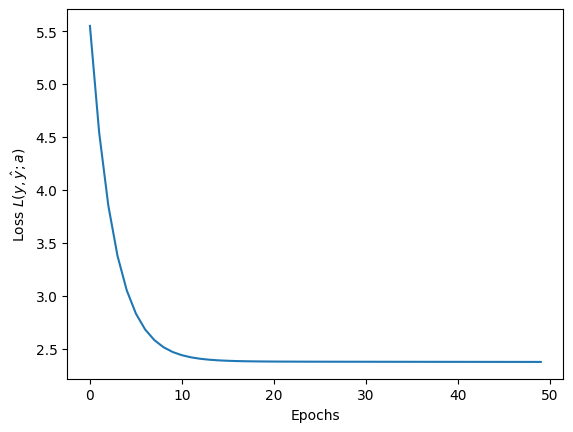

In [66]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel(r'Loss $L(y, \hat y; a)$')

In [67]:
y

tensor([1., 5., 2., 5.])

In [68]:
f(x)

tensor([2.8514, 2.5481, 1.8505, 5.2177], grad_fn=<SqueezeBackward0>)